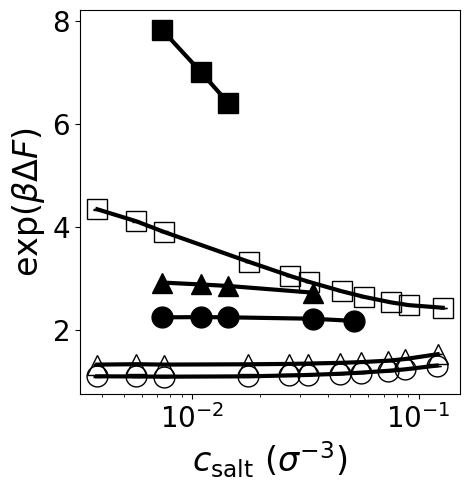

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 기본 설정
# =========================
beta = 1.0
concentrate_file = "concentrate_volume.csv"
concentrate_data = pd.read_csv(concentrate_file)
for col in concentrate_data.columns:
    globals()[col] = concentrate_data[col].dropna().to_numpy()

deltaF_files_LJ = {
    "0.2": "LD_0.2_LJ_deltaF.csv",
    "1":   "LD_1_LJ_deltaF.csv",
    "5":   "LD_5_LJ_deltaF.csv"
}

deltaF_files_WCA = {
    "0.2": "LD_0.2_WCA_deltaF.csv",
    "1":   "LD_1_WCA_deltaF.csv",
    "5":   "LD_5_WCA_deltaF.csv"
}

color_map = {'0.2': 'black', '1': 'black', '5': 'black'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}



# =========================
# Figure & Axes
# =========================
fig, ax1 = plt.subplots(figsize=(4.8,5))
# ax2 = ax1.twinx()

for eps in deltaF_files_LJ.keys():

    # ===== LJ =====
    df_LJ = pd.read_csv(deltaF_files_LJ[eps])
    df_LJ.columns = [c.strip() for c in df_LJ.columns]
    y_LJ = np.exp(beta * df_LJ["ΔF_mean"])
    y_err_LJ = y_LJ * df_LJ["ΔF_err"]
    if eps=="0.2":
        eps_temp = "02"
    else:
        eps_temp = eps
    x = f"mean_c_salt_{eps_temp}_lj"
    x = globals()[x] 

    ax1.plot(x, y_LJ, color=color_map[eps], linestyle='-', linewidth=3)
    ax1.errorbar(x, y_LJ, yerr=y_err_LJ, fmt=marker_map[eps],ecolor=color_map[eps], 
                 markerfacecolor=color_map[eps], markeredgecolor=color_map[eps],
                 markersize=15, linewidth=0, elinewidth=1, capsize=3,
                 label=f"LJ ε={eps}")

    # ===== WCA =====
    df_WCA = pd.read_csv(deltaF_files_WCA[eps])
    df_WCA.columns = [c.strip() for c in df_WCA.columns]
    y_WCA = np.exp(beta * df_WCA["ΔF_mean"])
    y_err_WCA = y_WCA * df_WCA["ΔF_err"]
    if eps=="0.2":
        eps_temp = "02"
    else:
        eps_temp = eps
    x = f"mean_c_salt_{eps_temp}_wca"
    x = globals()[x] 

    ax1.plot(x, y_WCA, color=color_map[eps], linestyle='-', linewidth=3)
    ax1.errorbar(x, y_WCA, yerr=y_err_WCA, fmt=marker_map[eps],ecolor=color_map[eps], 
                 markerfacecolor='none', markeredgecolor=color_map[eps],
                 markersize=15, linewidth=0, elinewidth=1, capsize=3,
                 label=f"WCA ε={eps}")

# =========================
# Labels & Style
# =========================
ax1.set_xlabel(r'$c_{\mathrm{salt}}$ $(\sigma^{-3})$', fontsize=24)
ax1.set_ylabel(r"$\exp(\beta \Delta F)$", fontsize=24, color="black")
# ax2.set_ylabel(r"$\exp(\beta \Delta F^{WCA})$", fontsize=24, color="black")

ax1.set_xscale("log")

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
# ax2.tick_params(axis='y', labelsize=20)

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()
# fig.legend(handles1 + handles2, labels1 + labels2,
        #    loc="upper center", ncol=3, fontsize=14)

plt.tight_layout()
plt.show()